No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


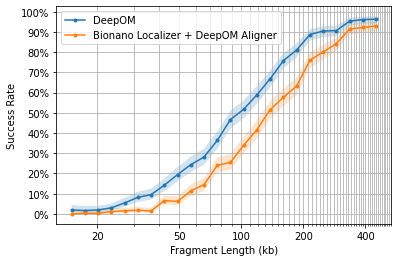

In [1]:
from deepom.bionano_compare import *
from deepom.bionano_utils import *

report_a = BionanoCompareReport()
report_a.run_name = "20221022T000533Z"
# report_a.run_name = "20221023T111725Z"
report_a.read_compute_results()
report_a.plot_a()
pyplot.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


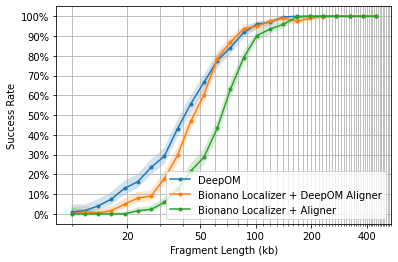

In [2]:
from deepom.bionano_compare import *

report_b = BionanoCompareReport()
# report_b.run_name = "20221022T102917Z"
report_b.run_name = "20221023T142148Z"

report_b.read_compute_results()
report_b.plot_b()
pyplot.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


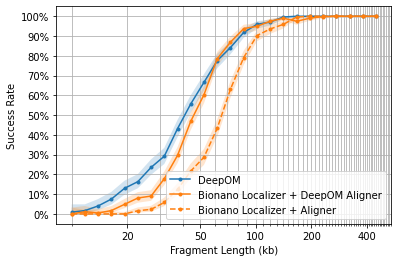

In [3]:

# _, axs = pyplot.subplots(figsize=(10, 4), dpi=200, ncols=2)

ax = pyplot.gca()
ax.set_prop_cycle(color=['tab:blue', 'tab:orange', 'tab:orange'], ls=['-', '-', '--'], marker=[".", ".", "."])
report_b.plot_compare_init()
report_b.plot_aligner_accuracy()
report_b.plot_aligner_bnx_accuracy()
report_b.plot_bionano_accuracy()
# pyplot.xlim(None, 400e3)
pyplot.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


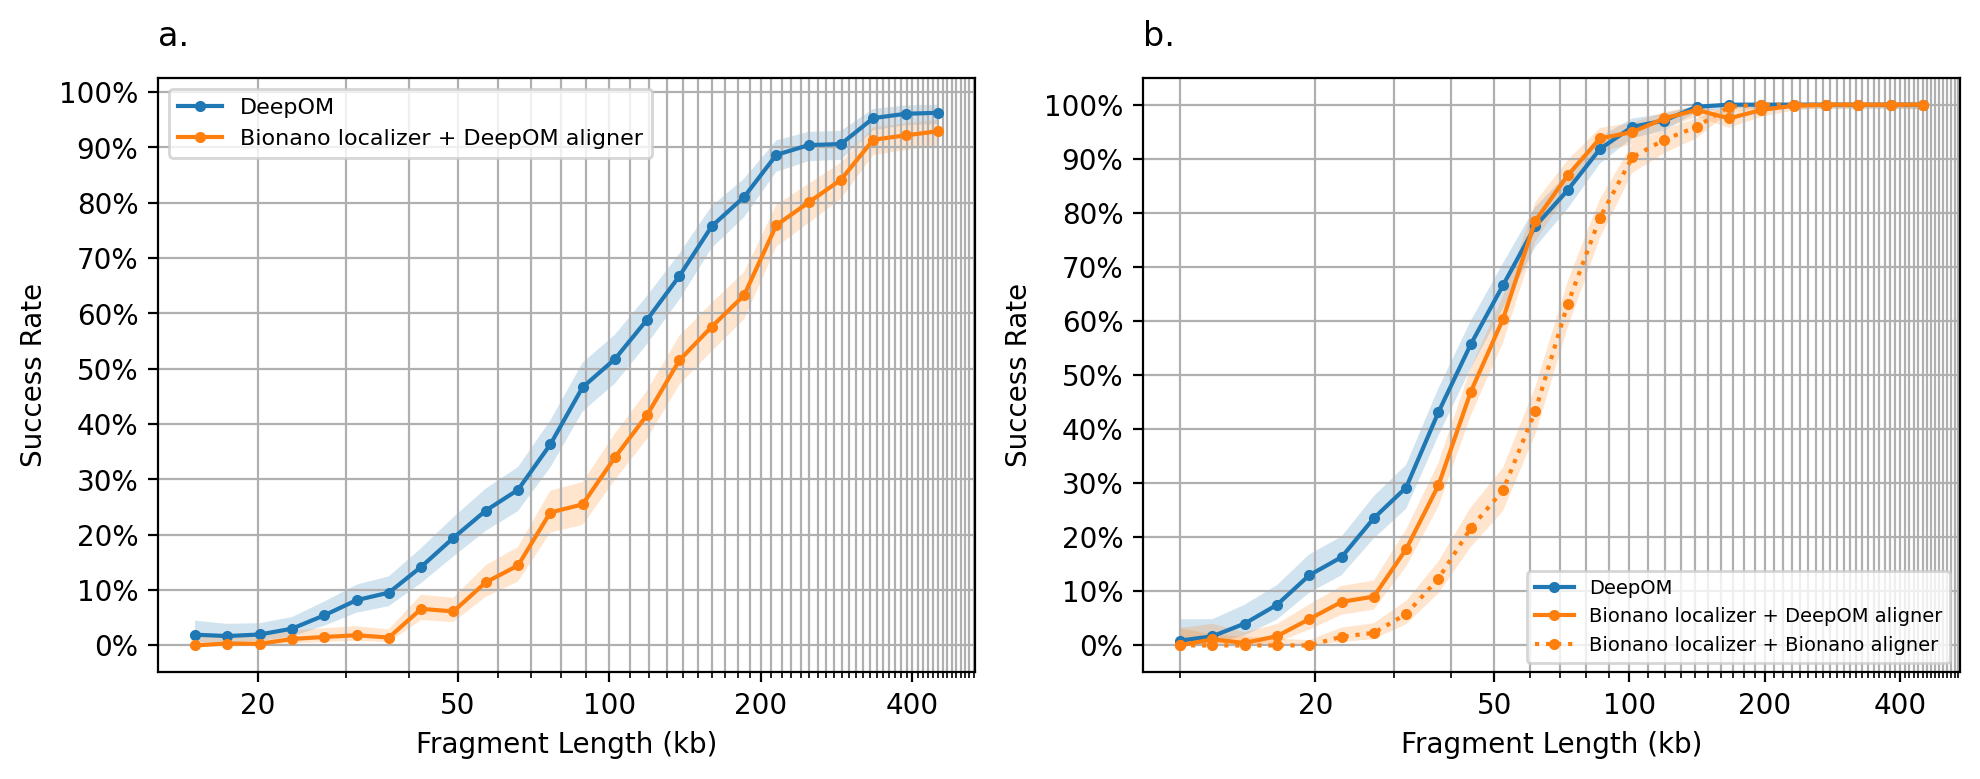

In [12]:
from pathlib import Path

_, axs = pyplot.subplots(figsize=(10, 4), dpi=200, ncols=2)

title_kw = dict(loc="left", y=1.1, pad=-10, fontdict={"color": "k"})
pyplot.sca(axs[0])

pyplot.title("a.", **title_kw)
report_a.plot_a()

# pyplot.gca().set_prop_cycle(color=['tab:blue', 'tab:orange'], marker=[".", "."])

pyplot.legend(
    pyplot.gca().lines,
    ["DeepOM", "Bionano localizer + DeepOM aligner"],
    fontsize=8,
)

pyplot.sca(axs[1])

# pyplot.gca().set_prop_cycle(color=['tab:blue', 'tab:orange', 'tab:orange'], ls=['-', '-', '--'], marker=[".", ".", "."])
pyplot.title("b.", **title_kw)
pyplot.gca().set_prop_cycle(color=['tab:blue', 'tab:orange', 'tab:orange'], ls=['-', '-', ':'], marker=[".", ".", "."])
report_b.plot_b()

pyplot.legend(
    pyplot.gca().lines,
    ["DeepOM", "Bionano localizer + DeepOM aligner", "Bionano localizer + Bionano aligner"],
    fontsize=7,
)

pyplot.tight_layout()
for ext in [".pdf"]:
    pyplot.savefig(Path("../../DeepOM-Paper/figures") / ("benchmark_figure" + ext), bbox_inches='tight')

<AxesSubplot: xlabel='OriginalMoleculeId'>

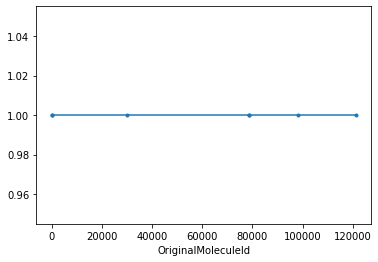

In [5]:
def stats_df(items):
    return DataFrame([
        vars(_) | 
        vars(_.alignment_item) | 
        vars(_.alignment_item.crop_item) | 
        {**_.alignment_item.crop_item.bnx_item.bnx_record}# | {**_.alignment_item.xmap_item.xmap_record}
        for _ in items
    ])
stats_df(report_b.bionano_accuracy_items).query("len_bp>=400000").groupby("OriginalMoleculeId")["correct"].mean().plot(marker='.')